# Numpy 入門

In [1]:
import numpy as np

In [2]:
a = np.array([0, 1, 2, 3, 4, 5])
a

array([0, 1, 2, 3, 4, 5])

In [3]:
a.ndim

1

In [4]:
a.shape

(6,)

In [5]:
b = a.reshape((3,2))
b

array([[0, 1],
       [2, 3],
       [4, 5]])

このとき、b は a のクローンではないことに注意。

In [6]:
b[1][0]=77
a

array([ 0,  1, 77,  3,  4,  5])

クローンする場合は、copy() を使う。

In [7]:
c = a.reshape((3,2)).copy()
c, a

(array([[ 0,  1],
        [77,  3],
        [ 4,  5]]), array([ 0,  1, 77,  3,  4,  5]))

配列に直接演算を行うと、要素に対して演算が行われる。

In [8]:
a*2

array([  0,   2, 154,   6,   8,  10])

In [9]:
a**2

array([   0,    1, 5929,    9,   16,   25])

## インデックス

In [10]:
a[np.array([2,3,4])]

array([77,  3,  4])

In [11]:
a>3

array([False, False,  True, False,  True,  True], dtype=bool)

In [12]:
a[a>3]

array([77,  4,  5])

フィルタされた値を揃えることも可能。

In [13]:
a[a>4]=100
a

array([  0,   1, 100,   3,   4, 100])

clip() でも同様に値を揃える演算が可能になる。

In [14]:
a.clip(0,5)

array([0, 1, 5, 3, 4, 5])

## 不適切な値への対応

In [15]:
c = np.array([1,2,np.NAN,3,4])
c

array([  1.,   2.,  nan,   3.,   4.])

In [16]:
np.isnan(c)

array([False, False,  True, False, False], dtype=bool)

In [17]:
c[~np.isnan(c)]

array([ 1.,  2.,  3.,  4.])

In [18]:
np.mean(c[~np.isnan(c)])

2.5

numpy では、複数の型を同一のリストに収納できない代わりに、numpu ユニークな関数を用いることで、高速な演算が可能になる。

# はじめての ML

In [19]:
import scipy as sp
data = sp.genfromtxt('web_traffic.tsv', delimiter='\t')
data

array([[  1.00000000e+00,   2.27200000e+03],
       [  2.00000000e+00,              nan],
       [  3.00000000e+00,   1.38600000e+03],
       ..., 
       [  7.41000000e+02,   5.39200000e+03],
       [  7.42000000e+02,   5.90600000e+03],
       [  7.43000000e+02,   4.88100000e+03]])

In [20]:
data.shape

(743, 2)

In [21]:
x = data[:, 0]
y = data[:, 1]
sp.sum(sp.isnan(y))

8

In [22]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

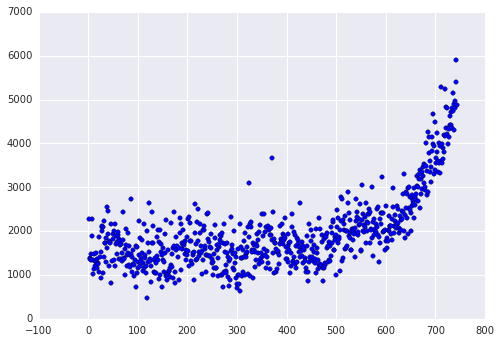

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(x, y)

エラー関数を定義する。

In [24]:
error = lambda f, x, y: sp.sum((f(x)-y)**2)
error(lambda x: x, 1, 1.1)

0.010000000000000018

polyfit() を使った多項式近似。fp1 がモデルのパラメタ。residuals が近似誤差を表す。

In [25]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)
fp1, residuals, rank, sv, rcond 

(array([   2.59619213,  989.02487106]),
 array([  3.17389767e+08]),
 2,
 array([ 1.36699071,  0.36240365]),
 1.6320278461989801e-13)

したがって、直線近似式 f1 を使うと、こんな感じ。

In [26]:
f1 = sp.poly1d(fp1)
print(error(f1, x, y))

317389767.34


図示すると・・・１次式ではうまく近似出来ていないことがわかる。

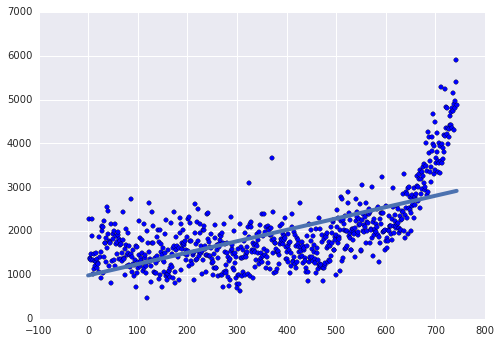

In [27]:
fx = sp.linspace(0, x[-1], 1000) # 1000 分割
plt.scatter(x, y)
plt.plot(fx, f1(fx), linewidth=4)

では、二次式ではどうか？誤差は小さくなるが・・・

Parameter [  1.05322215e-02  -5.26545650e+00   1.97476082e+03]
Error 179983507.878


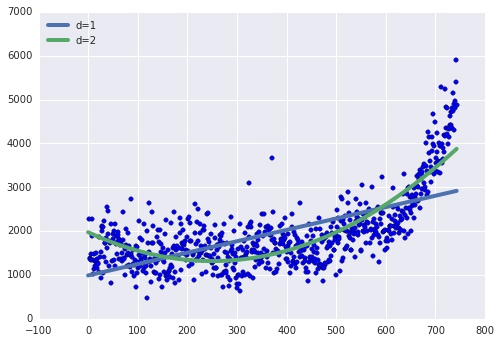

In [28]:
f2p = sp.polyfit(x, y, 2)
print('Parameter', (f2p))
f2 = sp.poly1d(f2p)
print('Error', error(f2, x, y))
plt.scatter(x, y)
plt.plot(fx, f1(fx), linewidth=4)
plt.plot(fx, f2(fx), linewidth=4)
plt.legend(["d=%i" % f1.order, "d=%i" % f2.order], loc="upper left")

/home/tushuhei/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


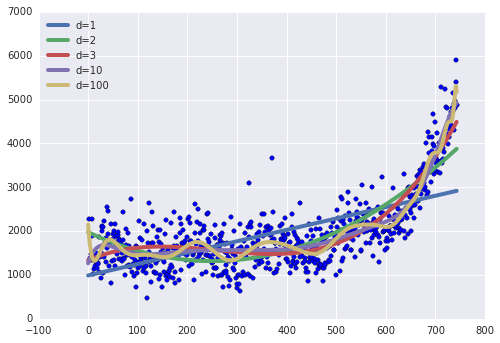

In [29]:
def get_polyf(df, x, y):
    param = sp.polyfit(x, y, df)
    f = sp.poly1d(param)
    return f
dfs = [1,2,3,10,100]
plt.scatter(x, y)
for df in dfs:
    f = get_polyf(df, x, y)
    plt.plot(fx, f(fx), linewidth=4)
plt.legend(["d=%i" % df for df in dfs], loc="upper left")

過学習しているっぽいので、しきい値を使ったモデルに切り替える。3.5 週目あたりを境に、異なる曲線を採用してはどうか。

Error 132950348.198


/home/tushuhei/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/home/tushuhei/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/home/tushuhei/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/tushuhei/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(0, 800)

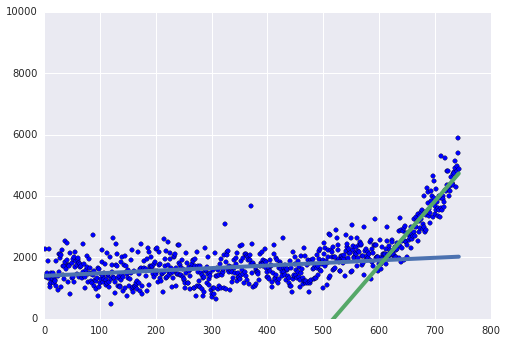

In [30]:
t = 3.5 * 7 * 24
fa = get_polyf(1, x[:t], y[:t])
fb = get_polyf(1, x[t:], y[t:])
fa_e = error(fa, x[:t], y[:t])
fb_e = error(fb, x[t:], y[t:])
print('Error', fa_e + fb_e)
plt.scatter(x, y)
plt.plot(fx, fa(fx), linewidth=4)
plt.plot(fx, fb(fx), linewidth=4)
plt.ylim(0, 10000)
plt.xlim(0, 800)

ちょっと未来まで足を伸ばしてみるとどうか？次数が大きくなると、誤差は減るものの、過学習によって汎化能力が落ちている。

/home/tushuhei/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


(0, 10000)

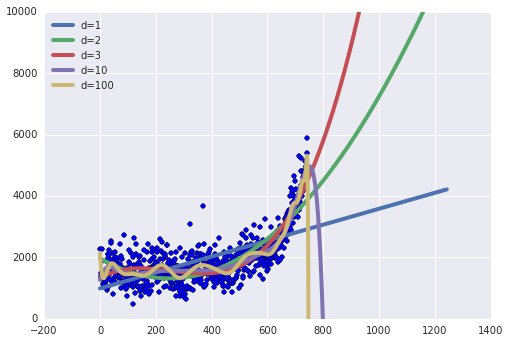

In [31]:
fx = fx = sp.linspace(0, x[-1]+500, 1000)
plt.scatter(x, y)
dfs = [1,2,3,10,100]
plt.scatter(x, y)
for df in dfs:
    f = get_polyf(df, x, y)
    plt.plot(fx, f(fx), linewidth=4)
plt.legend(["d=%i" % df for df in dfs], loc="upper left")
plt.ylim(0, 10000)

ここで、一旦 3.5 週目以降で学習した場合の、これまでのモデルの近似誤差を振り返ってみる。次数が大きくなるほどよい。

In [32]:
for df in dfs:
    f = get_polyf(df, x[t:], y[t:])
    print('df %i Error: %f' % (df, error(f, x[t:], y[t:])))

df 1 Error: 22143941.107618
df 2 Error: 19768846.989176
df 3 Error: 19766452.361027
df 10 Error: 18949296.467065
df 100 Error: 18300618.923358


/home/tushuhei/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/home/tushuhei/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/home/tushuhei/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/tushuhei/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


しかし、「あてはまり」が良くても、「予測精度が高い」とは限らない。予測精度が高いモデルを選択するために、評価を行う。ここでは、クロスバリデーションを用いる。結果、次数 2 か 3 あたりを取るのが良さそうである。

In [33]:
frac = 0.3
split_idx = int(frac * len(x[t:]))
shuffled = sp.random.permutation(range(len(x[t:])))
test_idxs = sorted(shuffled[:split_idx])
train_idxs = sorted(shuffled[split_idx:])

for df in dfs:
    f = get_polyf(df, x[train_idxs], y[train_idxs])  
    print('df %i Error: %f' % (df, error(f, x[test_idxs], y[test_idxs])))

df 1 Error: 6562389.785385
df 2 Error: 6677395.559322
df 3 Error: 6364213.467829
df 10 Error: 6172993.809559
df 100 Error: 794653426394.439941


/home/tushuhei/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/home/tushuhei/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/home/tushuhei/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


あらためて、winner をモデルを見てみる。計算してみると、10 週目あたりで 100,000 hits に達する見込みである。

In [46]:
f = sp.poly1d(sp.polyfit(x, y, 3))
print (f - 100000)
from scipy.optimize import fsolve
reached_max = fsolve(f - 100000, max(x)) / (7 * 24)
print ('100,000 hits/hour expected at week %f' % reached_max[0])

          3           2
3.05e-05 x - 0.02359 x + 4.942 x - 9.867e+04
100,000 hits/hour expected at week 10.381874
